In [2]:
import scipy
import numpy as np
x = np.array([[[1.0,2.0,3.0,4.0,5.0]]*3]*2)
k = np.array([0.0,0,1.0,0,0])

print("x", x)

res2 = scipy.ndimage.convolve1d(x, k, axis=-1, mode='constant', cval=0.0) #convolution using scipy straight forward

print("res", res2)

x [[[1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]]

 [[1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]]]
res [[[1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]]

 [[1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]
  [1. 2. 3. 4. 5.]]]


In [3]:
import torch
import torch.nn as nn
#convolution using pytorch

x = torch.tensor([[[1.0,2,3,4,5]]*3]*2) #batch of 2 2d tensor
k = torch.tensor([[0,0,2.0,0,0]]*3, dtype=torch.float32) #2d kernel

print("x\n", x)
print("filter\n", k)

res = nn.functional.conv1d(x, k[:, None, :], groups=3, padding="same") #allowing theta dependance in filter

print(res)

c:\Users\salom\anaconda3\envs\KEX\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


x
 tensor([[[1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.]],

        [[1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.]]])
filter
 tensor([[0., 0., 2., 0., 0.],
        [0., 0., 2., 0., 0.],
        [0., 0., 2., 0., 0.]])
tensor([[[ 2.,  4.,  6.,  8., 10.],
         [ 2.,  4.,  6.,  8., 10.],
         [ 2.,  4.,  6.,  8., 10.]],

        [[ 2.,  4.,  6.,  8., 10.],
         [ 2.,  4.,  6.,  8., 10.],
         [ 2.,  4.,  6.,  8., 10.]]])


In [4]:
x = torch.tensor([
    [
        [1,2,3,4,5],
        [1,2,3,4,5],
        [1,2,3,4,5]
    ],
    [
        [1,2,3,4,5],
        [1,2,3,4,5],
        [1,2,3,4,5]
    ]

], dtype=torch.float32)
print("x\n",x)
print(x.shape)
# print(x[None].shape)
k = torch.tensor([0,0,2,0,0], dtype=torch.float32) #1d kernel

res = nn.functional.conv2d(x[:, None], k[None, None, None], padding="same") # no theta depandance in filter

print("Result", res)

x
 tensor([[[1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.]],

        [[1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.],
         [1., 2., 3., 4., 5.]]])
torch.Size([2, 3, 5])
Result tensor([[[[ 2.,  4.,  6.,  8., 10.],
          [ 2.,  4.,  6.,  8., 10.],
          [ 2.,  4.,  6.,  8., 10.]]],


        [[[ 2.,  4.,  6.,  8., 10.],
          [ 2.,  4.,  6.,  8., 10.],
          [ 2.,  4.,  6.,  8., 10.]]]])


In [5]:
test = torch.zeros((5, 10), dtype=torch.float32)
rh = torch.tensor([1/i for i in range(1, 6)])
lh = torch.flip(rh, (0,))
print(lh)

test[0, :] = torch.concat([lh, rh])
print(test)

tensor([0.2000, 0.2500, 0.3333, 0.5000, 1.0000])
tensor([[0.2000, 0.2500, 0.3333, 0.5000, 1.0000, 1.0000, 0.5000, 0.3333, 0.2500,
         0.2000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]])


In [6]:
x = torch.arange(6)

f = torch.fft.fft(x)
fr = torch.fft.rfft(x)
y = torch.fft.ifft(f)
yr = torch.fft.irfft(fr)
print(x.shape, x)
print(f.shape, f)
print(fr.shape, fr)
print(y.shape, y)
print(yr.shape, yr)


torch.Size([6]) tensor([0, 1, 2, 3, 4, 5])
torch.Size([6]) tensor([15.+0.0000j, -3.+5.1962j, -3.+1.7321j, -3.+0.0000j, -3.-1.7321j,
        -3.-5.1962j])
torch.Size([4]) tensor([15.+0.0000j, -3.+5.1962j, -3.+1.7321j, -3.+0.0000j])
torch.Size([6]) tensor([0.0000+0.j, 1.0000+0.j, 2.0000+0.j, 3.0000+0.j, 4.0000+0.j, 5.0000+0.j])
torch.Size([6]) tensor([0., 1., 2., 3., 4., 5.])


In [7]:
from odl.phantom import ellipsoid_phantom, shepp_logan_ellipsoids
rad18 = np.deg2rad(18)

#  #           value  axisx  axisy     x       y  rotation
#     return [[2.00, .6900, .9200, 0.0000, 0.0000, 0],
#             [-.98, .6624, .8740, 0.0000, -.0184, 0],
#             [-.02, .1100, .3100, 0.2200, 0.0000, -rad18],
#             [-.02, .1600, .4100, -.2200, 0.0000, rad18],
#             [0.01, .2100, .2500, 0.0000, 0.3500, 0],
#             [0.01, .0460, .0460, 0.0000, 0.1000, 0],
#             [0.01, .0460, .0460, 0.0000, -.1000, 0],
#             [0.01, .0460, .0230, -.0800, -.6050, 0],
#             [0.01, .0230, .0230, 0.0000, -.6060, 0],
#             [0.01, .0230, .0460, 0.0600, -.6050, 0]]

def random_ellipsoid(min_pt, max_pt):
    return 


tensor([[ 0.,  1.,  2.,  3.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
tensor(4.)
tensor([[ 3.],
        [ 8.],
        [12.]])
tensor([[ 0.0000,  0.3333, -0.6667,  1.0000],
        [ 0.6250,  0.7500,  0.8750,  1.0000],
        [ 0.7500,  0.8333, -0.9167,  1.0000]])
torch.Size([12])
torch.Size([3, 4])


In [8]:
from ramlak import BP_layer, t_size, phi_size
import matplotlib.pyplot as plt
ram_filter = torch.arange(np.ceil(0.5 + 0.5*t_size))

ram_filter_tp = torch.fft.irfft(ram_filter)
ram_filter_tp = ram_filter_tp.repeat((phi_size, 1))
print(ram_filter_tp.shape)

space_filter = BP_layer(ram_filter_tp[None])[0]
freq_filter_r = torch.fft.fft2(space_filter).real + 648
freq_filter_i = torch.fft.fft2(space_filter).imag

print(freq_filter_r.shape)
print(torch.mean(freq_filter_r), torch.max(freq_filter_r), torch.min(freq_filter_r))
print(torch.mean(freq_filter_r**2))

print(torch.zeros(0))

torch.Size([100, 300])
torch.Size([128, 128])
tensor(647.8892) tensor(648.2140) tensor(486.1075)
tensor(419762.8125)
tensor([])


tensor(56187988.)


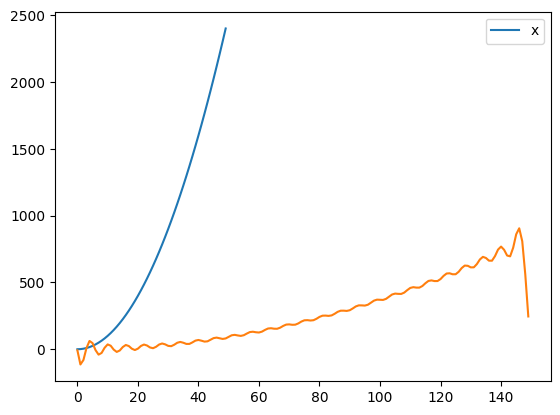

In [34]:
x = torch.arange(50)**2 #+ torch.randn(10)*25
z = torch.zeros((50))

padded = torch.concat([z, x, z])

w = torch.fft.rfft(x)
w_padded = torch.concat([w, z])
recovered = torch.fft.irfft(w_padded)


plt.plot([i for i in range(len(x))], x, label="x")
plt.plot([i for i in range(len(recovered))], recovered)
plt.legend()

print(torch.sum((padded-recovered)**2))